# Car Rental Analysis (Safe Version)
### Muhammad Ruslan Babar — 24079307
### Data Mining and Discovery

## Connect

In [98]:
import pandas as pd, sqlite3, matplotlib.pyplot as plt
conn=sqlite3.connect('car_rental.db')

## Load Tables

In [101]:
tables=['Customers','Branches','Cars','Car_Location','Rentals','Payments']
dfs={t:pd.read_sql(f'SELECT * FROM {t}',conn) for t in tables}
dfs['Customers'].head()

,customer_id,first_name,last_name,email,phone,membership_tier
0,1,Tracy,Washington,haydenscott@example.com,+1-895-374-3608,Gold
1,2,Todd,Davis,lawrencemiller@example.com,None,Gold
2,3,Anthony,Terry,vtaylor@example.org,(638)419-9693,Bronze
3,4,Sara,Fox,bradleylyons@example.net,910-426-6893x484,Gold
4,5,Sandra,Webb,garciachristopher@example.com,+1-642-991-5717x73015,Gold


## Helper SQL

In [104]:
def run_query(q): return pd.read_sql(q,conn)

## SQL Tests

### Tables

In [108]:
run_query("SELECT name FROM sqlite_master WHERE type='table';")

,name
0,sqlite_sequence
1,Branches
2,Car_Location
3,Rentals
4,Payments
5,Customers
6,Cars


<div>
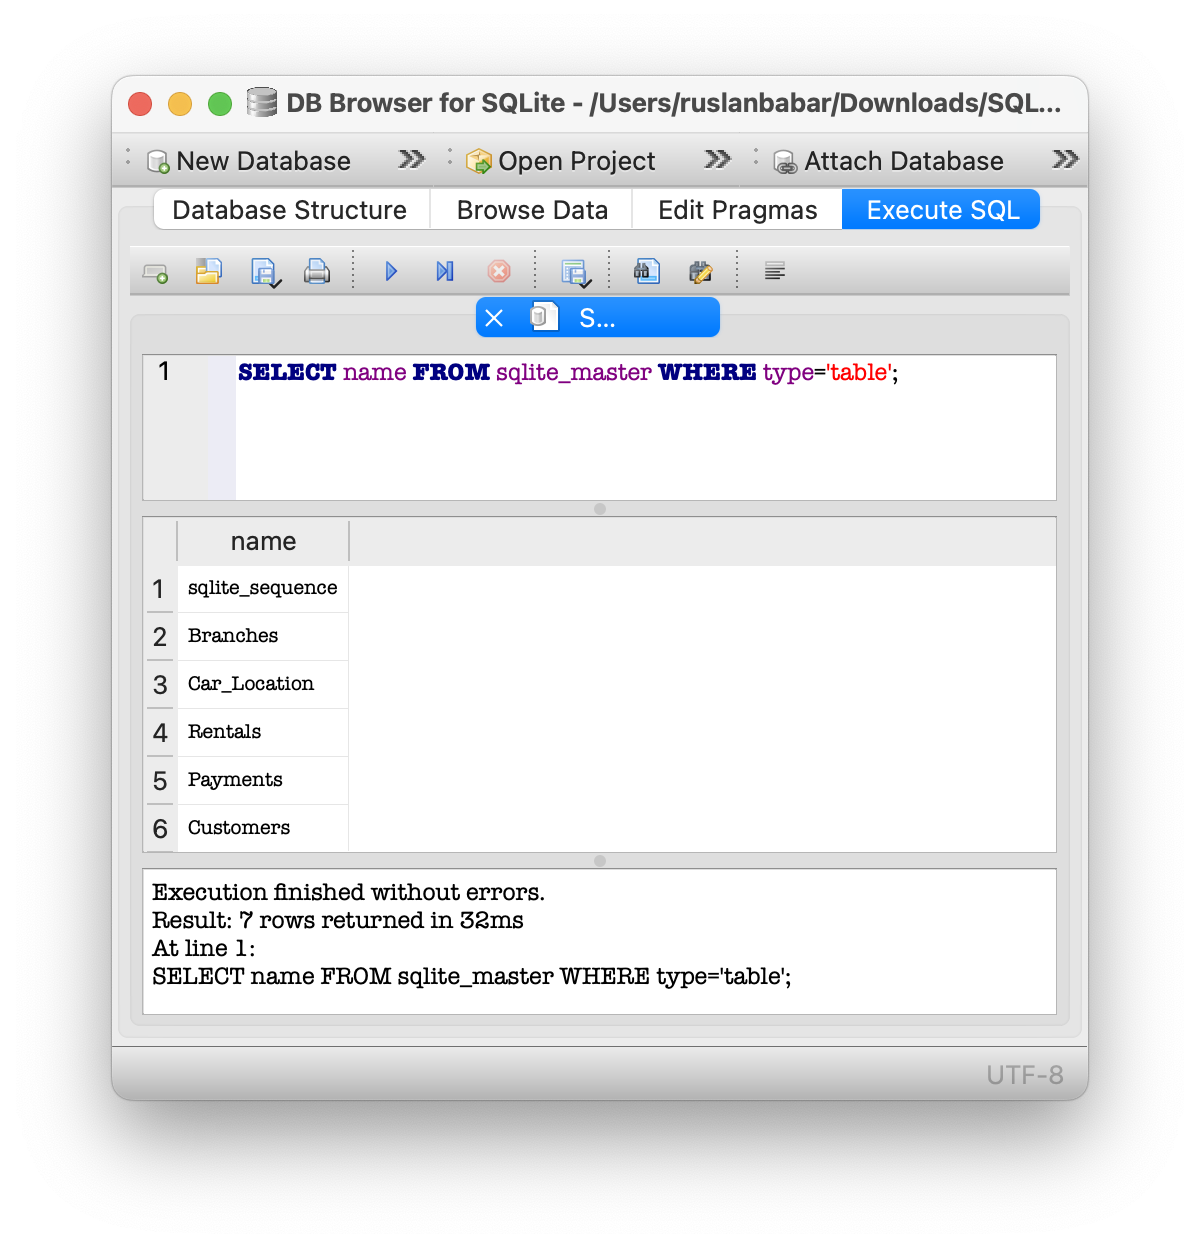
</div>

### Row Counts

In [112]:
for t in tables:
    print(t, run_query(f'SELECT COUNT(*) AS c FROM {t};'))

Customers      c
0  300
Branches     c
0  30
Cars      c
0  200
Car_Location      c
0  200
Rentals       c
0  1200
Payments       c
0  1200


### Foreign Key Check

In [126]:
run_query('PRAGMA foreign_key_check;')

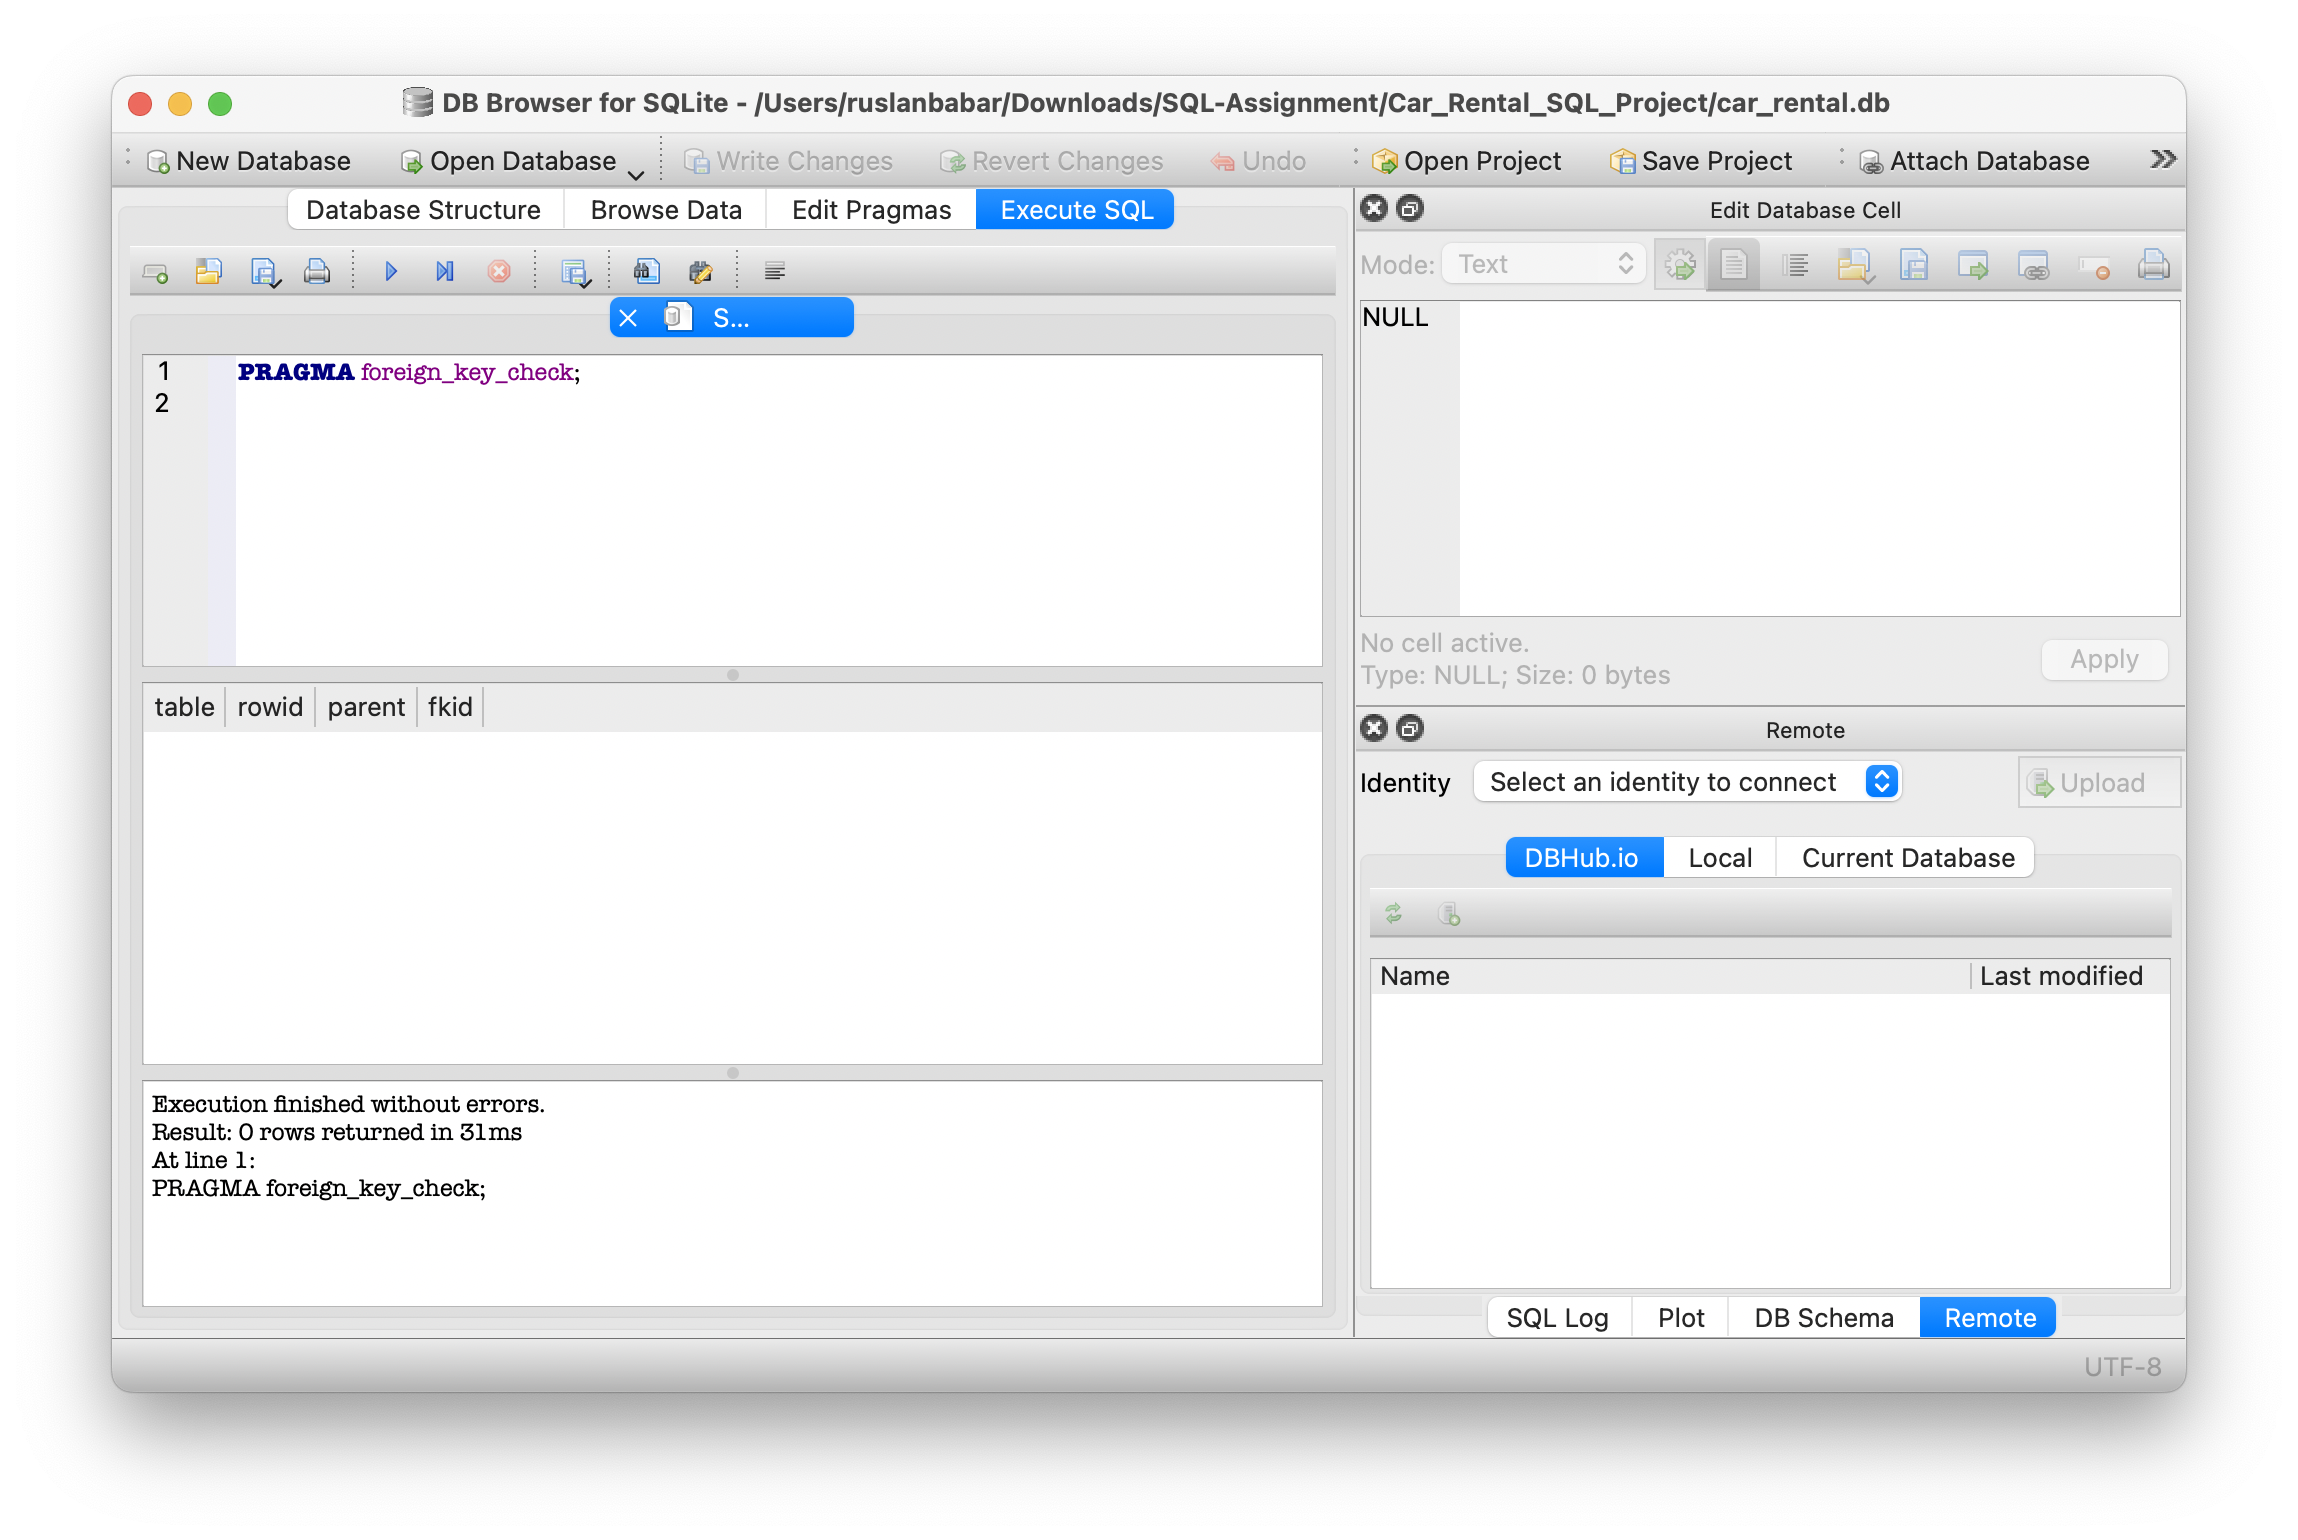

### Missing Phones

In [121]:
run_query('SELECT * FROM Customers WHERE phone IS NULL;')

,customer_id,first_name,last_name,email,phone,membership_tier
0,2,Todd,Davis,lawrencemiller@example.com,None,Gold
1,6,Todd,Lee,felicia16@example.com,None,Bronze
2,8,Lisa,Price,cbond@example.net,None,Gold
3,23,Joseph,Herrera,tracy05@example.org,None,Gold
4,31,Elizabeth,Stokes,rebeccaliu@example.net,None,Gold
5,60,Jennifer,Johnson,ashley98@example.net,None,Bronze
6,64,Mark,Boyd,stacygarcia@example.org,None,Bronze
7,84,Peter,Potts,larafrances@example.com,None,Silver
8,95,Robert,Long,melissa90@example.com,None,Bronze
9,106,Julie,Byrd,ifrank@example.com,None,Gold


<div>
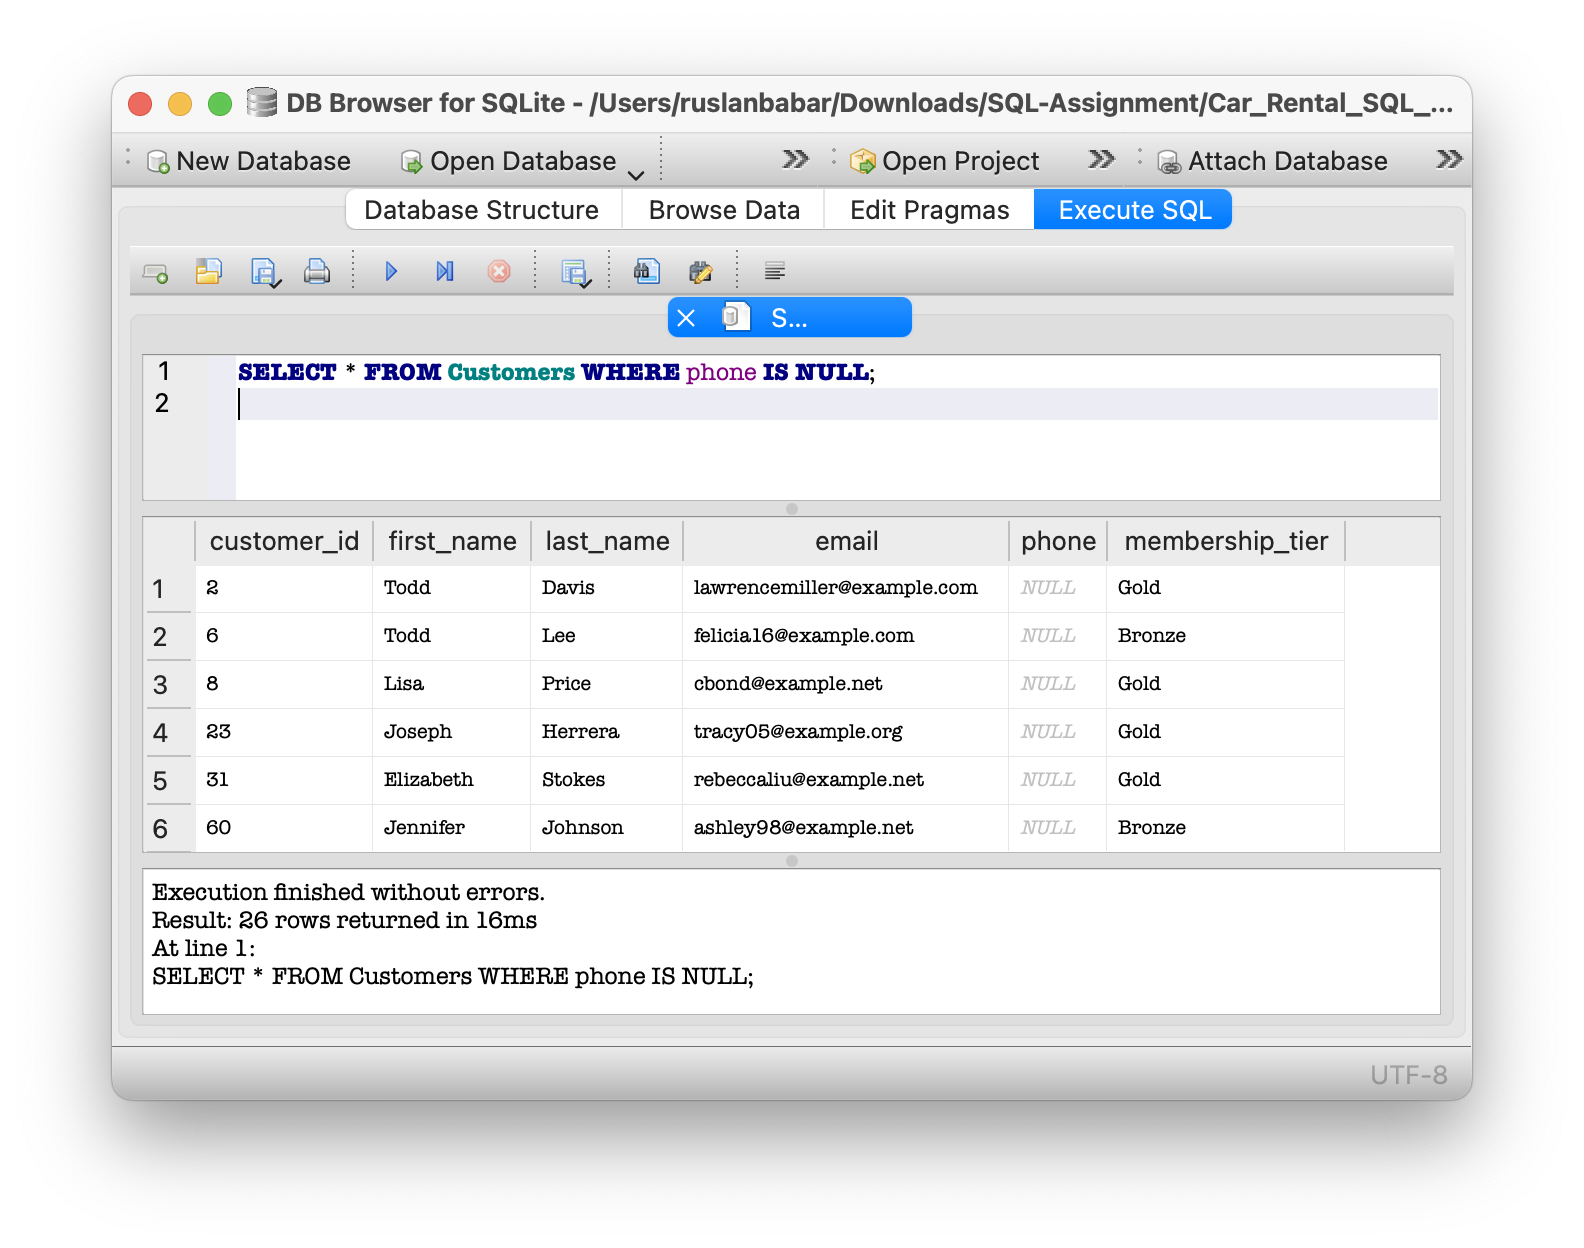
</div>

### Orphan Rentals

In [45]:
run_query('SELECT * FROM Rentals WHERE customer_id NOT IN (SELECT customer_id FROM Customers);')

,rental_id,customer_id,car_id,rental_date,return_date,rental_duration_days,total_cost


<div>
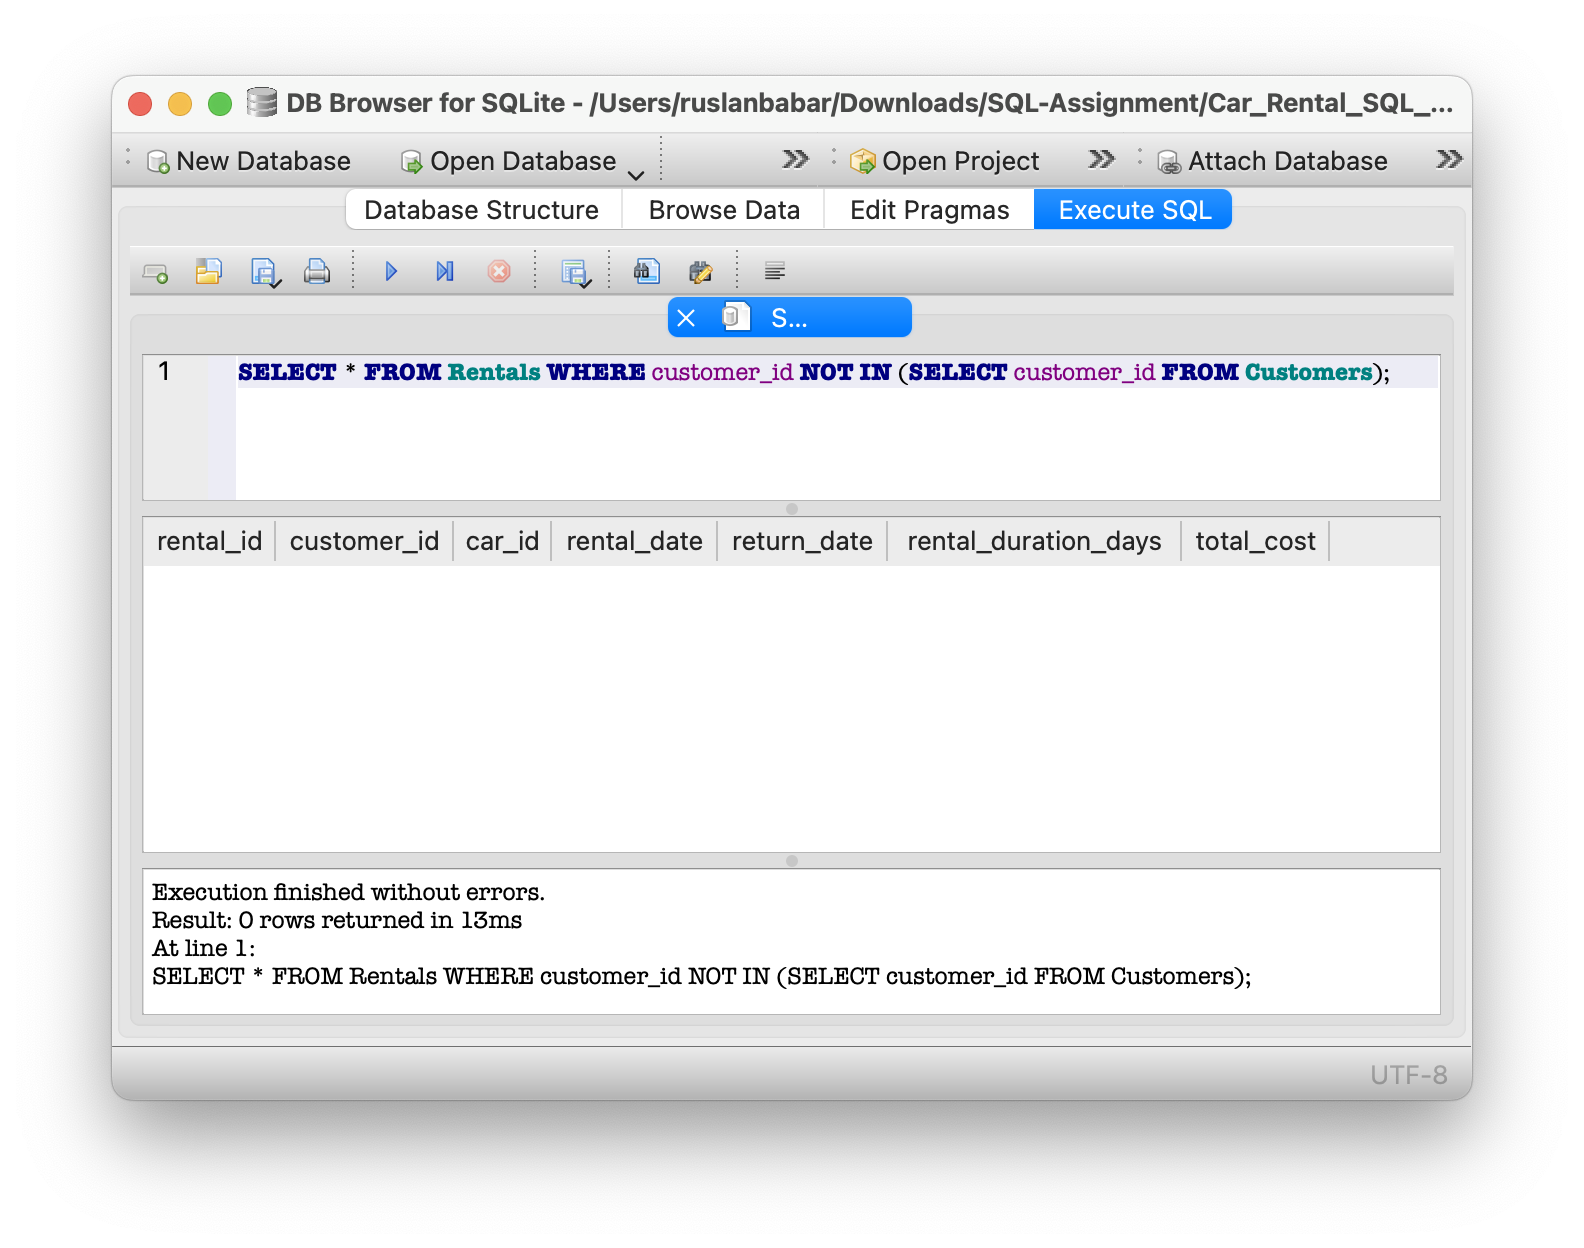
</div>

## Popular Cars

In [131]:
pop = dfs['Rentals'].merge(dfs['Cars'],on='car_id')\
      .groupby(['make','model']).size().reset_index(name='count')\
      .sort_values('count',ascending=False).head(10)
pop

,make,model,count
152,Nissan,Leave,14
110,Honda,Threat,12
132,Mercedes,Trouble,12
173,Toyota,Bill,12
183,Toyota,Language,11
136,Mercedes,Worker,11
58,BMW,Worker,11
127,Mercedes,Shake,11
63,Ford,Financial,11
46,BMW,Rather,11


## Top Spenders

In [134]:
spent = dfs['Rentals'].merge(dfs['Payments'],on='rental_id')\
        .merge(dfs['Customers'],on='customer_id')
spent = spent.groupby(['first_name','last_name'])['amount'].sum()\
        .reset_index().sort_values('amount',ascending=False).head(10)
spent

,first_name,last_name,amount
233,Rachel,Herman,10361.62
31,Bernard,Daniel,9836.92
250,Sarah,Fritz,9523.64
243,Robert,Romero,9126.74
100,James,Long,8762.43
99,James,Kramer,8420.01
145,Kelly,Spears,8266.25
183,Mark,Mitchell,8103.24
194,Melissa,Neal,7964.21
221,Nicholas,Miller,7879.91


## Branch Revenue

In [137]:
branch = dfs['Rentals'].merge(dfs['Payments'],on='rental_id')\
         .merge(dfs['Car_Location'],on='car_id')\
         .merge(dfs['Branches'],on='branch_id')
branch = branch.groupby('branch_name')['amount'].sum()\
         .reset_index().sort_values('amount',ascending=False)
branch

,branch_name,amount
13,Marks Ltd,61055.44
7,Farley Group,59467.41
18,"Ochoa, Butler and Espinoza",50908.26
21,Richards-Anderson,47827.35
26,Smith PLC,47516.99
12,Jacobs-Chambers,46223.09
10,Hall-Coleman,45903.99
8,Garcia-Yu,44772.11
17,Merritt-Gould,43812.69
9,Gonzalez and Sons,42502.88


## Avg Duration by Tier

In [140]:
tier = dfs['Rentals'].merge(dfs['Customers'],on='customer_id')\
       .groupby('membership_tier')['rental_duration_days'].mean()\
       .reset_index()
tier

,membership_tier,rental_duration_days
0,Bronze,6.559105
1,Gold,6.711111
2,Silver,6.702517


## Monthly Revenue

In [143]:
dfs['Rentals']['month']=dfs['Rentals']['rental_date'].str[:7]
mr = dfs['Rentals'].merge(dfs['Payments'],on='rental_id')\
     .groupby('month')['amount'].sum().reset_index()
mr

,month,amount
0,2022-01,31176.33
1,2022-02,22750.60
2,2022-03,21354.80
3,2022-04,14405.21
4,2022-05,13686.31
5,2022-06,21124.93
6,2022-07,19652.94
7,2022-08,18383.98
8,2022-09,17104.17
9,2022-10,16291.23


## Graph: Monthly Revenue

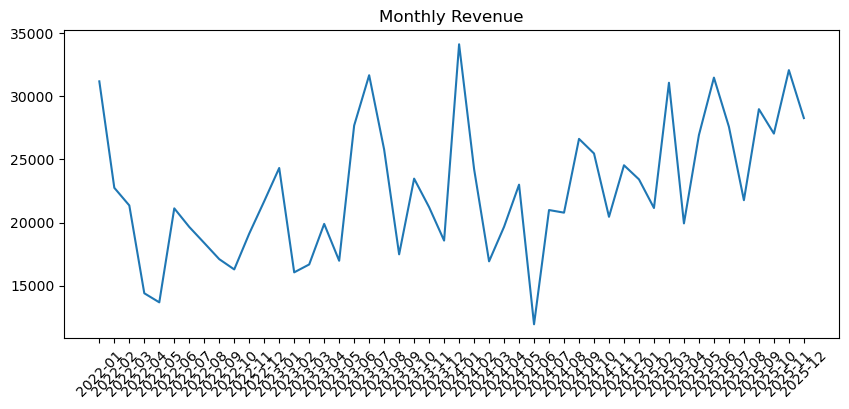

In [146]:
plt.figure(figsize=(10,4))
plt.plot(mr['month'],mr['amount'])
plt.xticks(rotation=45)
plt.title('Monthly Revenue')
plt.show()

## Graph: Popular Cars

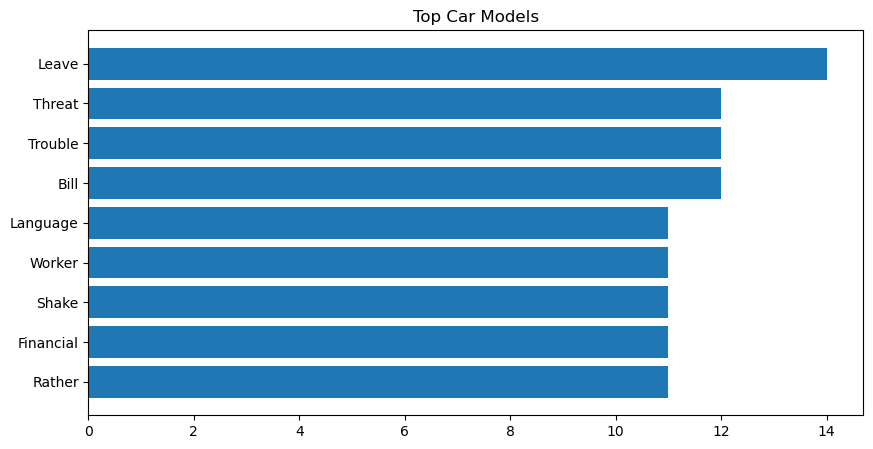

In [149]:
plt.figure(figsize=(10,5))
plt.barh(pop['model'], pop['count'])
plt.title('Top Car Models')
plt.gca().invert_yaxis()
plt.show()

## Graph: Branch Revenue

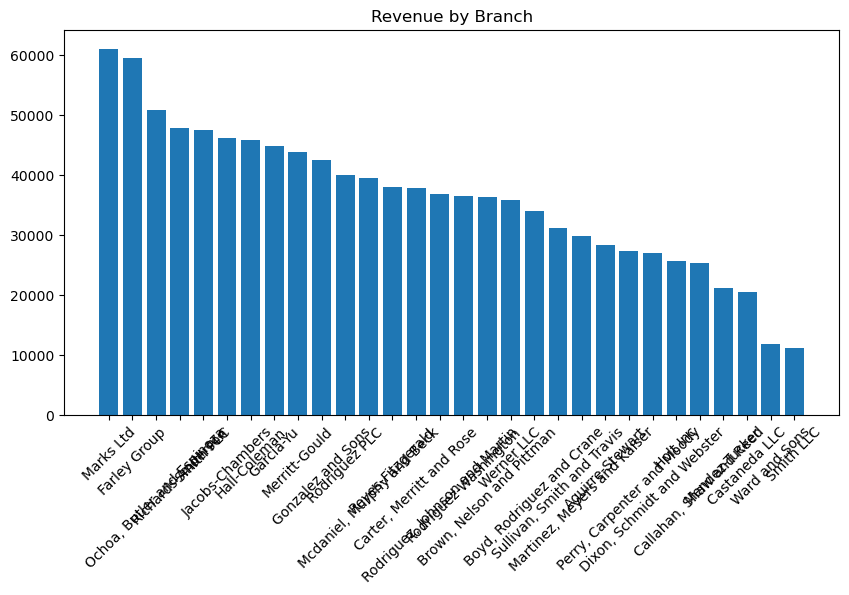

In [152]:
plt.figure(figsize=(10,5))
plt.bar(branch['branch_name'], branch['amount'])
plt.xticks(rotation=45)
plt.title('Revenue by Branch')
plt.show()

## Safe Insert Example

In [170]:
conn.execute("INSERT INTO Customers (first_name,last_name,email,phone,membership_tier) VALUES ('John','Safe','john.safe@example.com','07000000000','Silver')")
conn.commit()
run_query("SELECT * FROM Customers WHERE email='john.safe@example.com';")

,customer_id,first_name,last_name,email,phone,membership_tier
0,None,John,Safe,john.safe@example.com,07000000000,Silver


<div>
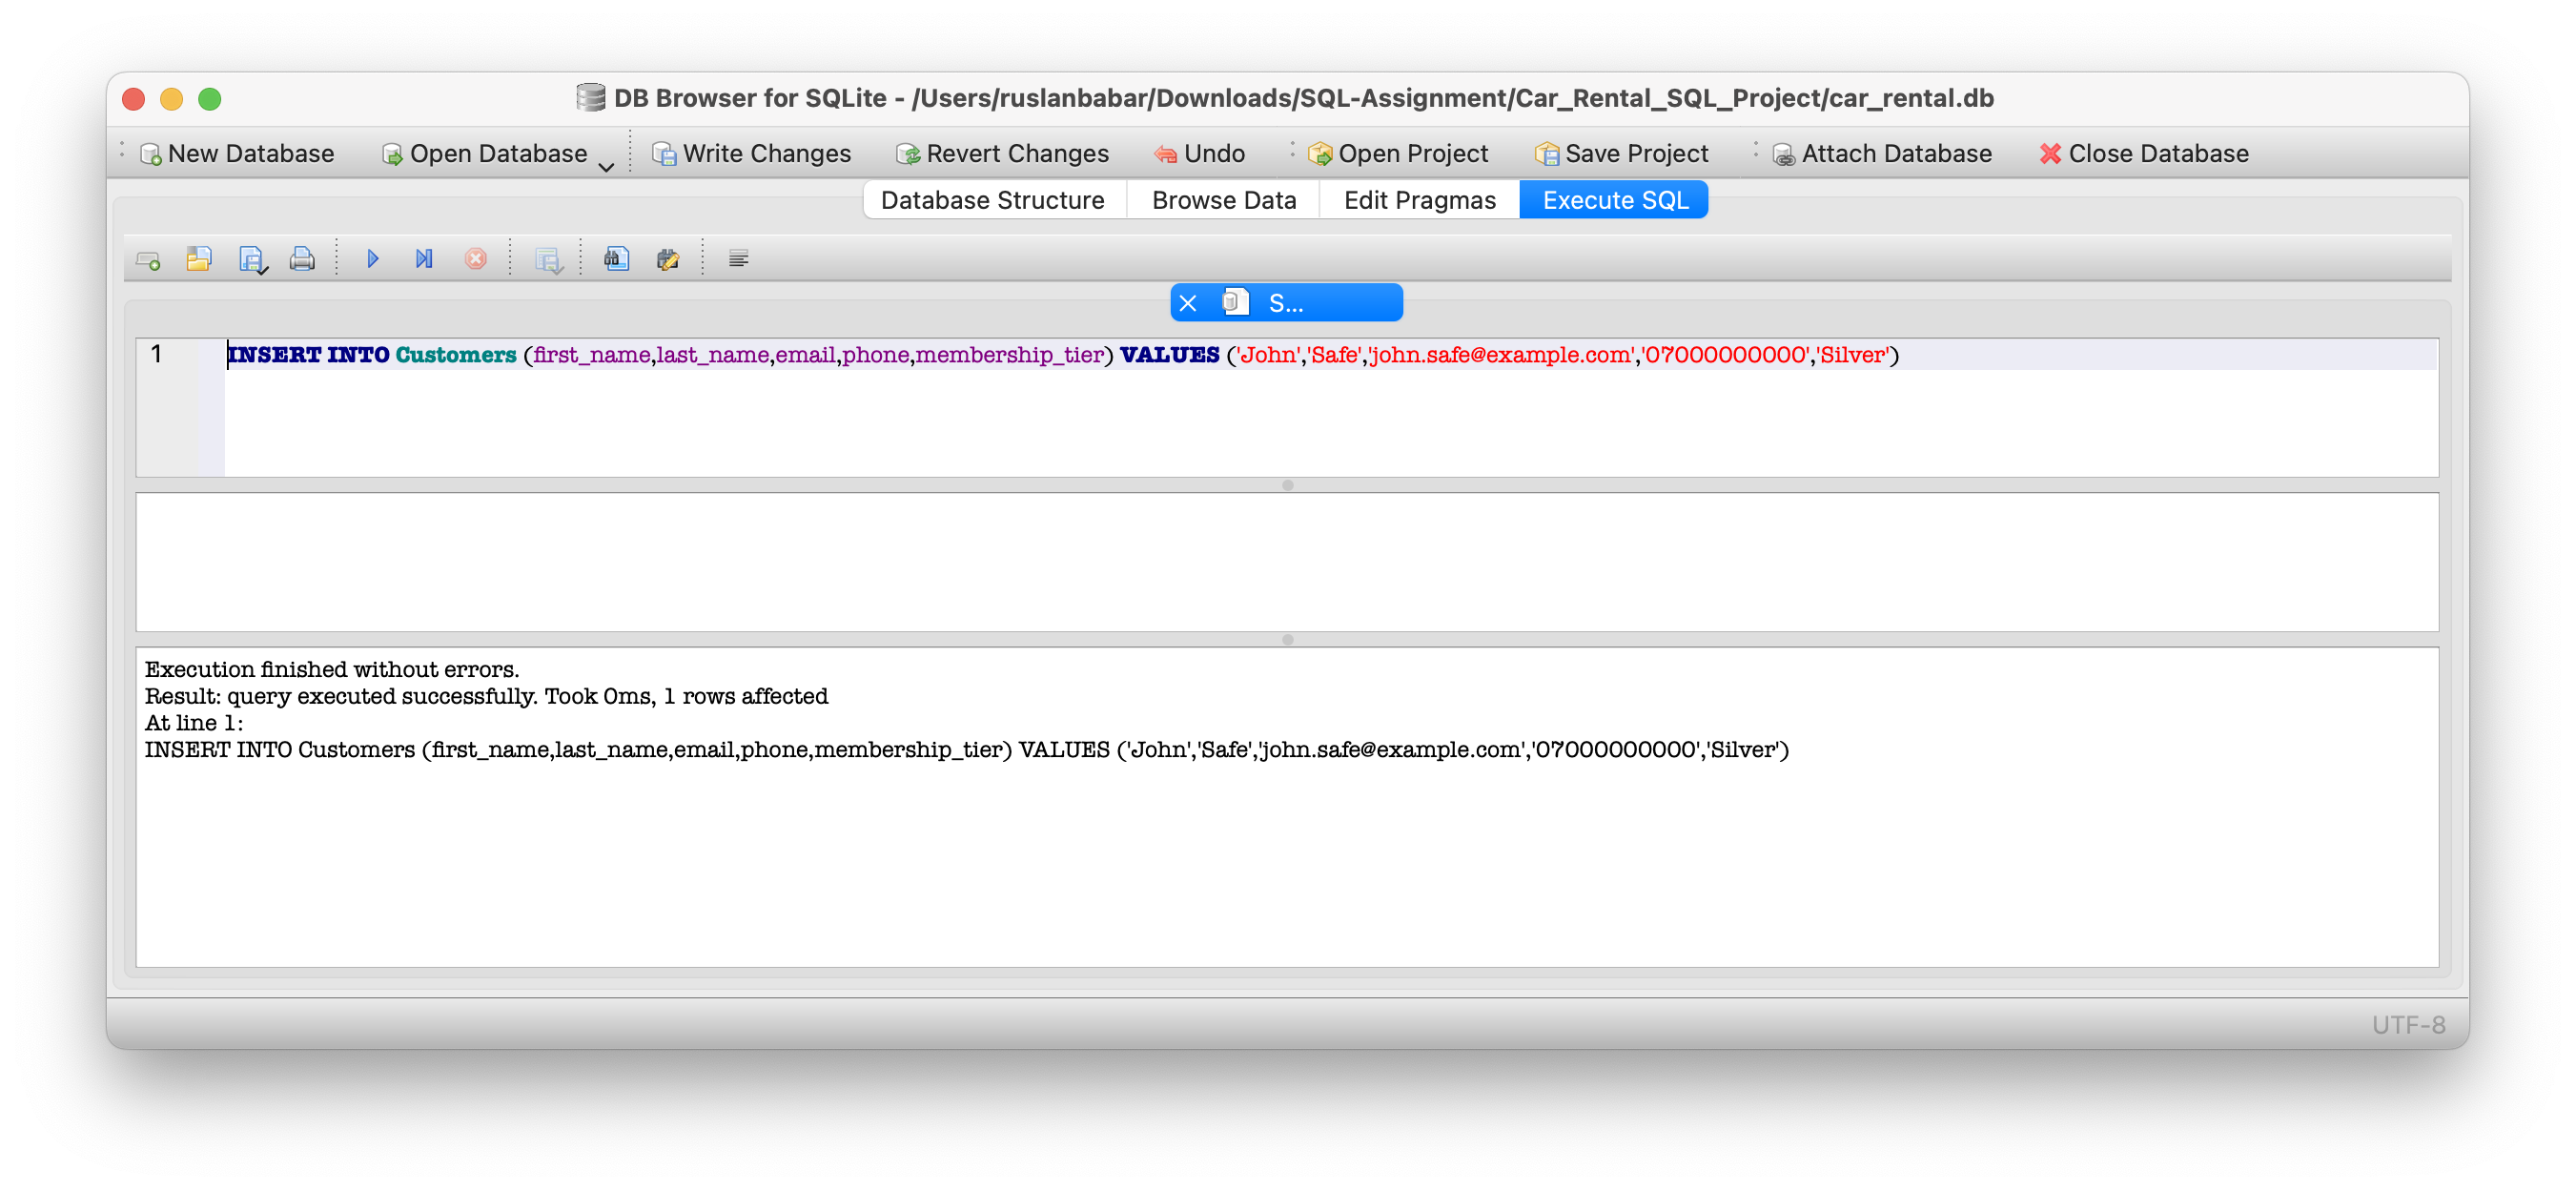
</div>

## Safe Update Example

In [166]:
conn.execute("UPDATE Cars SET status='Maintenance' WHERE car_id=1")
conn.commit()
run_query("SELECT * FROM Cars WHERE car_id=1;")

,car_id,make,model,year,mileage,daily_rate,status
0,1,Audi,Budget,2005,136826.6,51.23,Maintenance


## Safe Delete Example

In [168]:
conn.execute("DELETE FROM Customers WHERE email='john.safe@example.com'")
conn.commit()
run_query("SELECT * FROM Customers WHERE email='john.safe@example.com';")

,customer_id,first_name,last_name,email,phone,membership_tier


## Close

In [81]:
conn.close()